In [10]:
# Importing the requirements
import tweepy 
import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
import seaborn as sns 
from textblob import TextBlob
import re
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
# Credentials
consumer_key = "qWF2rE0dec6LxvAZPb7i9g6FA"
consumer_secret = "TYJafyXjqQqP2tpNLUfXnuLosWloMQ0ZqAt8jFIWmHwxT5Nmv6"

access_key = "2726160288-fmXj24icgK2MrK1NjJLoScTwxuZuy3GPBulZ92j"
access_secret = "BK8HbvERk2jef2jBbOIlhb0WNbYETWztC7Y9rTbv5iizj"

In [12]:
def twitter_setup():
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    api = tweepy.API(auth)
    return api

In [15]:
# Twitter handle
screen_name="narendramodi"

def get_all_tweets(screen_name):
    
    # Authentication and access using keys:
    auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    
    # Return API with authentication:
    api=tweepy.API(auth)
    
    tweets=[]
    new_tweets=api.user_timeline(screen_name=screen_name, count=200)
    tweets.extend(new_tweets)
    
    oldest=tweets[-1].id-1
    
    while len(new_tweets)>0:
        print(f"Getting tweets before {oldest}")
        #all request will include oldest parameter to exclude the chances of the duplicates 
        new_tweets=api.user_timeline(screen_name=screen_name, count=200, max_id=oldest)
        tweets.extend(new_tweets)
        oldest=tweets[-1].id-1
        print(f"Number of Tweets have been downloaded so far: {len(tweets)}")
    
    return tweets

tweets=get_all_tweets(screen_name)
print("5 recent Tweets")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Getting tweets before 1384790325193973766
Number of Tweets have been downloaded so far: 400
Getting tweets before 1377909255689306112
Number of Tweets have been downloaded so far: 600
Getting tweets before 1370341049860644869
Number of Tweets have been downloaded so far: 800
Getting tweets before 1363407765675397119
Number of Tweets have been downloaded so far: 1000
Getting tweets before 1354464374535020543
Number of Tweets have been downloaded so far: 1200
Getting tweets before 1348973291311140863
Number of Tweets have been downloaded so far: 1400
Getting tweets before 1341025847902261248
Number of Tweets have been downloaded so far: 1600
Getting tweets before 1330854740410830847
Number of Tweets have been downloaded so far: 1800
Getting tweets before 1323947986037035013
Number of Tweets have been downloaded so far: 2000
Getting tweets before 1318205444549013504
Number of Tweets have been downloaded so far: 2200
Getting tweets before 1309864809391775743
Number of Tweets have been down

In [16]:
# Shaping the data
data=pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])
display(data.head(10))

,Tweets
0,विकास और पर्यावरण में संतुलन हमारी पुरातन परंप...
1,जलवायु परिवर्तन के खतरे से निपटने के लिए जो वै...
2,आज से 7-8 साल पहले देश में इथेनॉल की कभी उतनी ...
3,हरदोई के अरविंद कुमार जी ने बताया कि वैज्ञानिक...
4,आणंद के अमित कुमार प्रजापति जी को बायोगैस प्ला...
5,पुणे के बालू नाथू वाघमारे जी ने बताया कि किस प...
6,Addressing a programme on #WorldEnvironmentDay...
7,Reviewed India's vaccination drive including t...
8,"At 11 AM tomorrow, 5th June will take part in ..."
9,I called @MauritiusPM Pravind Jugnauth to conv...


In [17]:
# Components of the tweet
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [18]:
#Adding relevant data to Panda DataFrame 
data['Length']=np.array([len(tweet.text) for tweet in tweets])
data['ID']=np.array([tweet.id for tweet in tweets])
data['Date']=np.array([tweet.created_at for tweet in tweets])
data['Source']=np.array([tweet.source for tweet in tweets])
data['Likes']=np.array([tweet.favorite_count for tweet in tweets])
data['RTs']=np.array([tweet.retweet_count for tweet in tweets])
display(data.head(10))

,Tweets,Length,ID,Date,Source,Likes,RTs
0,विकास और पर्यावरण में संतुलन हमारी पुरातन परंप...,137,1401099385824440322,2021-06-05 08:51:39,Twitter Media Studio,20571,4064
1,जलवायु परिवर्तन के खतरे से निपटने के लिए जो वै...,140,1401099327217356801,2021-06-05 08:51:25,Twitter Media Studio,13247,2997
2,आज से 7-8 साल पहले देश में इथेनॉल की कभी उतनी ...,140,1401099232501661700,2021-06-05 08:51:02,Twitter Media Studio,12702,2989
3,हरदोई के अरविंद कुमार जी ने बताया कि वैज्ञानिक...,140,1401098876422025220,2021-06-05 08:49:37,Twitter Media Studio,12769,2919
4,आणंद के अमित कुमार प्रजापति जी को बायोगैस प्ला...,126,1401098804250615809,2021-06-05 08:49:20,Twitter Media Studio,9641,2588
5,पुणे के बालू नाथू वाघमारे जी ने बताया कि किस प...,139,1401098674407542784,2021-06-05 08:48:49,Twitter Media Studio,14150,2969
6,Addressing a programme on #WorldEnvironmentDay...,92,1401053150841167874,2021-06-05 05:47:56,Twitter Media Studio,21869,4681
7,Reviewed India's vaccination drive including t...,139,1400839416013275137,2021-06-04 15:38:37,Twitter for iPhone,35849,5411
8,"At 11 AM tomorrow, 5th June will take part in ...",140,1400823203203719169,2021-06-04 14:34:12,Twitter Web App,40451,6062
9,I called @MauritiusPM Pravind Jugnauth to conv...,140,1400799942436872196,2021-06-04 13:01:46,Twitter for iPhone,27295,3729


In [19]:
#Data Analysis 
mean=np.mean(data['Length'])
print(f"The Avaerage length of a tweet:  {mean}")

The Avaerage length of a tweet:  125.26215384615385


In [21]:
#Most liked and retweeted tweets
lik_max=np.max(data['Likes'])
rt_max=np.max(data['RTs'])

#Extract the index of max
fav=data[data.Likes==lik_max].index[0]
rt=data[data.RTs==rt_max].index[0]

#Print the result
print(f"The most liked tweet is: {data['Tweets'][fav]}")
print(f"Number of likes: {lik_max}")
print("------------------")
print()

#Print the most retweeted tweet
print(f"The most Retweeted tweet is: {data['Tweets'][rt]}")
print(f"Number of Retweets: {rt_max}")
print("------------------")
print()

The most liked tweet is: Sushant Singh Rajput...a bright young actor gone too soon. He excelled on TV and in films. His rise in the world of… https://t.co/1SGDaJ0TjW
Number of likes: 404862
------------------

The most Retweeted tweet is: राष्ट्ररक्षासमं पुण्यं,

राष्ट्ररक्षासमं व्रतम्,

राष्ट्ररक्षासमं यज्ञो,

दृष्टो नैव च नैव च।।

नभः स्पृशं दीप्तम्.… https://t.co/Fu0jpWheXv
Number of Retweets: 54905
------------------



In [22]:
#Plots 
like=pd.Series(data=data['Likes'].values, index=data['Date'])
retweet=pd.Series(data=data['RTs'].values, index=data['Date'])

<AxesSubplot:xlabel='Date'>

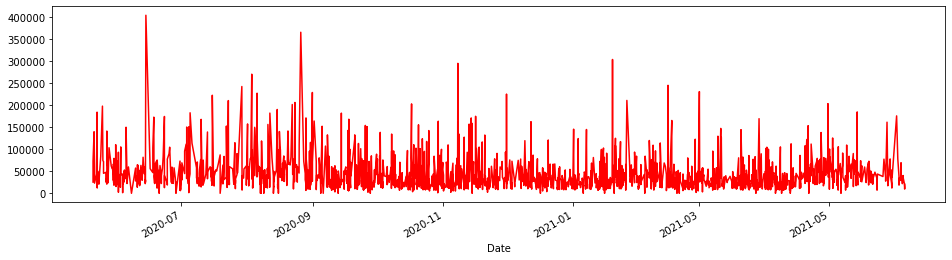

In [23]:
like.plot(figsize=(16,4), color='r')

<AxesSubplot:xlabel='Date'>

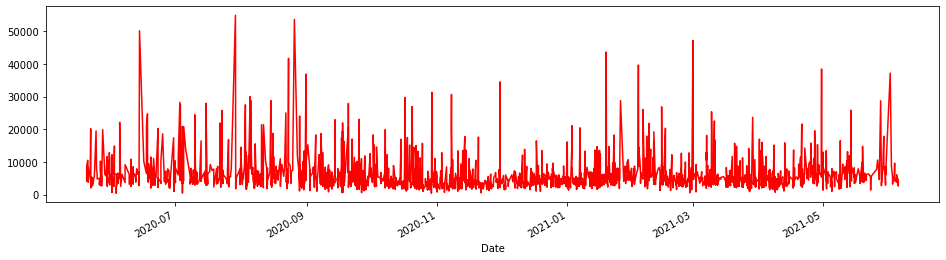

In [24]:
retweet.plot(figsize=(16,4), color='r')

<AxesSubplot:xlabel='Date'>

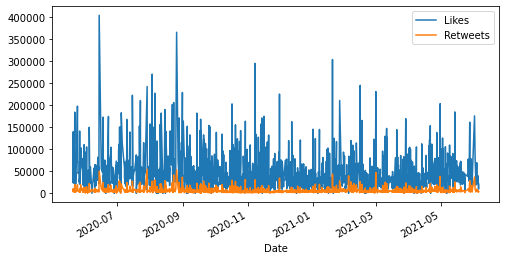

In [25]:
like.plot(figsize=(8,4), label="Likes", legend=True)
retweet.plot(figsize=(8,4), label="Retweets", legend=True)

In [26]:
#Before proceeding with any data analysis let's analyze whether we have null in dataset.
#We got False, stating that we have no null in DataFrame
data.isnull().any()

Tweets    False
Length    False
ID        False
Date      False
Source    False
Likes     False
RTs       False
dtype: bool

In [27]:
data.describe()

,Length,ID,Likes,RTs
count,3250.000000,3.250000e+03,3250.000000,3250.000000
mean,125.262154,1.332553e+18,31228.512000,4728.318769
std,27.066114,3.516200e+16,32524.472967,4440.591975
min,23.000000,1.263130e+18,0.000000,372.000000
25%,127.000000,1.306553e+18,12773.000000,2459.000000
50%,140.000000,1.329919e+18,21119.000000,3519.500000
75%,140.000000,1.362636e+18,37092.500000,5393.750000
max,148.000000,1.401099e+18,404862.000000,54905.000000


In [36]:
#I'm curious how many times Modi talks about Elections. Let's see. 
swachh_count = data.Tweets[data.Tweets.str.contains('election', flags=re.IGNORECASE)].count() 
print(f"PM Modi has tweeted about Election {swachh_count} times.")
print("--------------------------------")
print()
data.Tweets[data.Tweets.str.contains('election', flags=re.IGNORECASE)]

PM Modi has tweeted about Election 20 times.
--------------------------------



142     Congratulations to Thiru @mkstalin and @arival...
143     Gratitude to the people of Kerala who supporte...
144     I would like to congratulate Shri @vijayanpina...
161     Last phase of the 2021 West Bengal elections t...
179     The seventh phase of the West Bengal elections...
188     Addressing a virtual rally for the West Bengal...
229     Urging all those voting in today’s fifth phase...
289     As the 4th phase of the West Bengal elections ...
360     Elections are taking place in Assam, Kerala, P...
421     I’ve seen many elections but the 2021 Puducher...
470     Today, Phase 1 of the West Bengal Assembly ele...
471     The first phase of elections begin in Assam. U...
512     Thank you Goa for the continuous support to BJ...
769     Thank you Gujarat! \n\nResults of municipal el...
1693    Congratulations to Daw Aung San Suu Kyi &amp; ...
1809    Addressing an election rally in Saharsa. Here ...
1923    Congratulations to the people of Seychelles fo...
1924    Felici